# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

## Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',                        # Path ke direktori dataset. Semua gambar di dalam subdirektori akan dimuat sebagai dataset.
    labels='inferred',              # Label secara otomatis diambil dari nama subdirektori.
    label_mode='categorical',       # Format label dalam bentuk kategori (one-hot encoding). Alternatif: 'int' untuk integer atau None jika tanpa label.
    class_names=None,               # Daftar nama kelas, diambil dari subdirektori jika None.
    color_mode='rgb',               # Mode warna gambar, 'rgb' untuk gambar berwarna, atau 'grayscale' untuk gambar hitam putih.
    batch_size=32,                  # Jumlah gambar per batch dalam dataset.
    image_size=(64, 64),            # Ukuran gambar yang diubah (resize) menjadi (64, 64) piksel.
    shuffle=True,                   # Gambar diacak sebelum dimasukkan ke dalam batch.
    seed=None,                      # Seed untuk memastikan urutan acak tetap sama di setiap eksekusi, None berarti tidak ada seed.
    validation_split=None,          # Persentase data yang dipisahkan untuk validasi, None berarti semua data digunakan untuk pelatihan.
    subset=None,                    # Tentukan subset ('training' atau 'validation') jika `validation_split` digunakan.
    interpolation='bilinear',       # Metode interpolasi untuk mengubah ukuran gambar. Alternatif: 'nearest', 'bicubic', dll.
    follow_links=False,             # Jika True, mengikuti link simbolis untuk menemukan file gambar.
    crop_to_aspect_ratio=False      # Jika True, gambar akan di-crop agar sesuai rasio aspek asli sebelum diubah ukurannya.
)


Found 3115 files belonging to 36 classes.


Melihat Class Names

In [126]:
class_names = training_set.class_names
print("Class Names:", class_names)


Class Names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Struktur Dataset

In [127]:
for images, labels in training_set.take(1):  # Ambil satu batch
    print("Shape of images:", images.shape)  # Bentuk tensor gambar
    print("Shape of labels:", labels.shape)  # Bentuk tensor label
    print("Labels (one-hot encoded):", labels.numpy())  # Nilai label


Shape of images: (32, 64, 64, 3)
Shape of labels: (32, 36)
Labels (one-hot encoded): [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Menampilkan Gambar Contoh

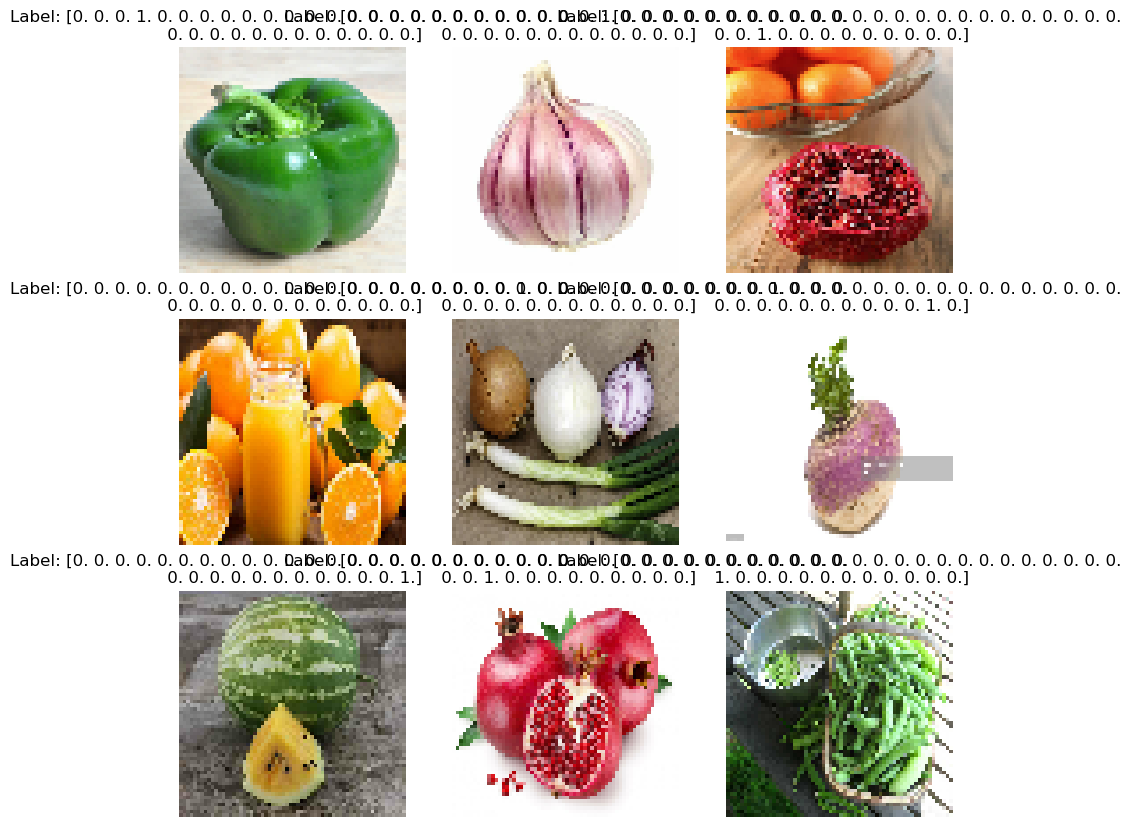

In [128]:
import matplotlib.pyplot as plt

# Ambil satu batch
for images, labels in training_set.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Tampilkan 9 gambar
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Label: " + str(labels[i].numpy()))
        plt.axis("off")


Memeriksa Elemen Dataset

In [134]:
for images, labels in training_set.take(1):
    print("Shape of images in a batch:", images.shape)  # Bentuk gambar dalam batch
    print("Shape of labels in a batch:", labels.shape)  # Bentuk label dalam batch


Shape of images in a batch: (32, 64, 64, 3)
Shape of labels in a batch: (32, 36)


Menampilkan Data dalam Bentuk Tensor

In [130]:
for images, labels in training_set.take(1):
    print("Image tensor example:", images[0].numpy())  # Data gambar pertama
    print("Label tensor example:", labels[0].numpy())  # Label gambar pertama


Image tensor example: [[[254.   254.   254.  ]
  [243.   253.75 238.5 ]
  [253.   253.   253.  ]
  ...
  [241.   250.75 243.25]
  [233.   243.   242.  ]
  [243.   252.   251.  ]]

 [[236.5  243.5  236.5 ]
  [221.25 224.5  203.  ]
  [255.   255.   255.  ]
  ...
  [222.5  228.5  222.  ]
  [233.75 242.   241.25]
  [105.25 139.75 105.5 ]]

 [[230.5  238.   234.5 ]
  [226.   231.75 216.5 ]
  [215.75 233.75 232.25]
  ...
  [206.5  237.5  206.25]
  [ 76.75 117.75  43.25]
  [241.25 251.5  245.25]]

 ...

 [[  0.     0.     0.  ]
  [  0.     0.     0.  ]
  [  0.     1.     0.  ]
  ...
  [ 60.   109.    60.  ]
  [ 42.75  95.    45.5 ]
  [ 29.5   74.5   41.5 ]]

 [[  0.     0.     0.  ]
  [  0.     0.     0.  ]
  [  0.     0.     0.  ]
  ...
  [ 49.75  95.75  68.75]
  [ 42.25  84.25  70.25]
  [ 39.25  82.75  61.25]]

 [[  1.     1.     1.  ]
  [  0.     0.     0.  ]
  [  0.     0.     0.  ]
  ...
  [ 37.75  81.25  55.25]
  [ 30.75  76.25  51.75]
  [ 42.75  86.75  69.75]]]
Label tensor example: [0

Melihat Dimensi Dataset

In [131]:
print("Batch size:", training_set.element_spec[0].shape[0])
print("Image size:", training_set.element_spec[0].shape[1:3])


Batch size: None
Image size: (64, 64)


Cek Distribusi Label

In [132]:
import numpy as np
label_counts = {}
for images, labels in training_set:
    for label in np.argmax(labels.numpy(), axis=1):
        label_counts[label] = label_counts.get(label, 0) + 1

print("Label distribution:", label_counts)


Label distribution: {6: 82, 0: 68, 30: 97, 29: 97, 33: 92, 1: 75, 10: 94, 35: 84, 22: 83, 23: 89, 12: 92, 9: 87, 21: 69, 24: 100, 7: 79, 18: 97, 13: 68, 4: 92, 32: 69, 14: 100, 11: 84, 27: 77, 15: 88, 31: 91, 3: 90, 25: 99, 26: 79, 8: 87, 19: 86, 2: 88, 34: 98, 17: 82, 5: 89, 28: 81, 20: 94, 16: 88}


## Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'test',                        # Path ke direktori dataset untuk validasi. Semua gambar di dalam subdirektori akan dimuat sebagai dataset validasi.
    labels="inferred",             # Label secara otomatis diambil dari nama subdirektori.
    label_mode="categorical",      # Format label dalam bentuk kategori (one-hot encoding). Alternatif: 'int' untuk integer atau None jika tanpa label.
    class_names=None,              # Daftar nama kelas, diambil dari subdirektori jika None.
    color_mode="rgb",              # Mode warna gambar, 'rgb' untuk gambar berwarna, atau 'grayscale' untuk gambar hitam putih.
    batch_size=32,                 # Jumlah gambar per batch dalam dataset.
    image_size=(64, 64),           # Ukuran gambar yang diubah (resize) menjadi (64, 64) piksel.
    shuffle=True,                  # Gambar diacak sebelum dimasukkan ke dalam batch.
    seed=None,                     # Seed untuk memastikan urutan acak tetap sama di setiap eksekusi, None berarti tidak ada seed.
    validation_split=None,         # Persentase data yang dipisahkan untuk validasi. Tidak digunakan karena `validation_split=None`.
    subset=None,                   # Subset tidak ditentukan (harus 'training' atau 'validation' jika `validation_split` digunakan).
    interpolation="bilinear",      # Metode interpolasi untuk mengubah ukuran gambar. Alternatif: 'nearest', 'bicubic', dll.
    follow_links=False,            # Jika True, mengikuti link simbolis untuk menemukan file gambar.
)


Found 351 files belonging to 36 classes.


Melihat Nama Class

In [135]:
print("Class names:", validation_set.class_names)


Class names: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


Informasi Dataset

In [136]:
for images, labels in validation_set.take(1):  # Ambil satu batch
    print("Shape of images:", images.shape)  # Dimensi gambar
    print("Shape of labels:", labels.shape)  # Dimensi label


Shape of images: (32, 64, 64, 3)
Shape of labels: (32, 36)


 Menampilkan Gambar Contoh

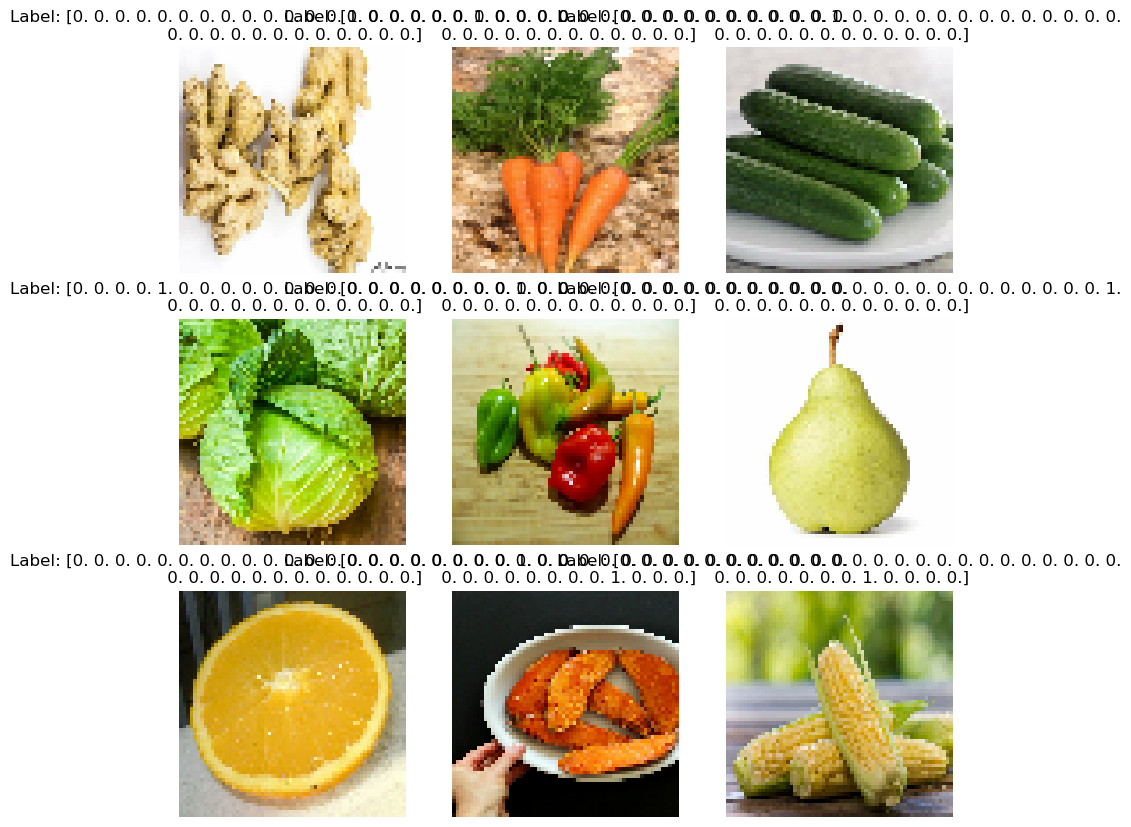

In [137]:
import matplotlib.pyplot as plt

for images, labels in validation_set.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Tampilkan 9 gambar pertama
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Label: " + str(labels[i].numpy()))
        plt.axis("off")


Distribusi Label

In [139]:
import numpy as np

label_counts = {}
for _, labels in validation_set:
    for label in np.argmax(labels.numpy(), axis=1):
        label_counts[label] = label_counts.get(label, 0) + 1

print("Label distribution:", label_counts)


Label distribution: {15: 9, 10: 10, 4: 10, 28: 9, 29: 10, 14: 9, 17: 10, 23: 10, 21: 9, 22: 10, 30: 10, 31: 10, 12: 10, 7: 10, 2: 10, 33: 10, 19: 10, 32: 10, 5: 10, 9: 10, 0: 10, 1: 9, 27: 10, 11: 10, 20: 10, 25: 10, 16: 10, 34: 10, 6: 9, 24: 10, 26: 10, 18: 9, 35: 10, 3: 9, 8: 9, 13: 10}


# Building Model CNN

In [4]:
cnn = tf.keras.models.Sequential()

## Building Convolution Layer

 Convulesion Layer 1

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Dropout(0.25))

Convulesion Layer 2

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=40)

Epoch 1/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 246ms/step - accuracy: 0.0288 - loss: 13.6463 - val_accuracy: 0.0370 - val_loss: 3.5751
Epoch 2/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 229ms/step - accuracy: 0.0313 - loss: 3.5809 - val_accuracy: 0.0313 - val_loss: 3.5788
Epoch 3/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step - accuracy: 0.0462 - loss: 3.5751 - val_accuracy: 0.0399 - val_loss: 3.5591
Epoch 4/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.0355 - loss: 3.5647 - val_accuracy: 0.0826 - val_loss: 3.5036
Epoch 5/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.0549 - loss: 3.5289 - val_accuracy: 0.0969 - val_loss: 3.4957
Epoch 6/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.0651 - loss: 3.4904 - val_accuracy: 0.1652 - val_loss: 3.3241
Epoch 7/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 207ms/step - accuracy: 0.0947 - loss: 3.3811 - val_accuracy: 0.1738 - val_loss: 3.2628
Epoch 8/40
98/98 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.1014 - loss: 3.3110 - val_acc

## Evaluating Model

In [124]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step - accuracy: 0.9635 - loss: 0.1316
Training accuracy: 0.9666131734848022


In [125]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.9401 - loss: 0.5415
Validation accuracy: 0.934472918510437


## Saving Model

In [103]:
cnn.save('trained_model.h5')

In [20]:
training_history.history #Return Dictionary of history

{'accuracy': [0.033707864582538605,
  0.026966292411088943,
  0.041091494262218475,
  0.039807382971048355,
  0.05489566549658775,
  0.0703049749135971,
  0.08988764137029648,
  0.11075441539287567,
  0.14895665645599365,
  0.1678972691297531,
  0.2462279349565506,
  0.2908507287502289,
  0.37303370237350464,
  0.42182984948158264,
  0.4847511947154999,
  0.5560192465782166,
  0.5743178129196167,
  0.6288924813270569,
  0.6699839234352112,
  0.708507239818573,
  0.7335473299026489,
  0.7393258213996887,
  0.77110755443573,
  0.7701444625854492,
  0.812199056148529,
  0.8186196088790894,
  0.8407704830169678,
  0.8468700051307678,
  0.8584269881248474,
  0.8581059575080872,
  0.8757624626159668,
  0.8959871530532837,
  0.8581059575080872,
  0.8882824778556824,
  0.8889245390892029,
  0.8921348452568054,
  0.902407705783844,
  0.9142857193946838,
  0.9162119030952454,
  0.9065810441970825],
 'loss': [6.050105571746826,
  3.582017183303833,
  3.5767383575439453,
  3.557652235031128,
  3.5

In [21]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [22]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [23]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.4472918510437 %


## Accuracy Visualization

 Training Visualization

In [25]:
training_history.history['accuracy']

[0.033707864582538605,
 0.026966292411088943,
 0.041091494262218475,
 0.039807382971048355,
 0.05489566549658775,
 0.0703049749135971,
 0.08988764137029648,
 0.11075441539287567,
 0.14895665645599365,
 0.1678972691297531,
 0.2462279349565506,
 0.2908507287502289,
 0.37303370237350464,
 0.42182984948158264,
 0.4847511947154999,
 0.5560192465782166,
 0.5743178129196167,
 0.6288924813270569,
 0.6699839234352112,
 0.708507239818573,
 0.7335473299026489,
 0.7393258213996887,
 0.77110755443573,
 0.7701444625854492,
 0.812199056148529,
 0.8186196088790894,
 0.8407704830169678,
 0.8468700051307678,
 0.8584269881248474,
 0.8581059575080872,
 0.8757624626159668,
 0.8959871530532837,
 0.8581059575080872,
 0.8882824778556824,
 0.8889245390892029,
 0.8921348452568054,
 0.902407705783844,
 0.9142857193946838,
 0.9162119030952454,
 0.9065810441970825]

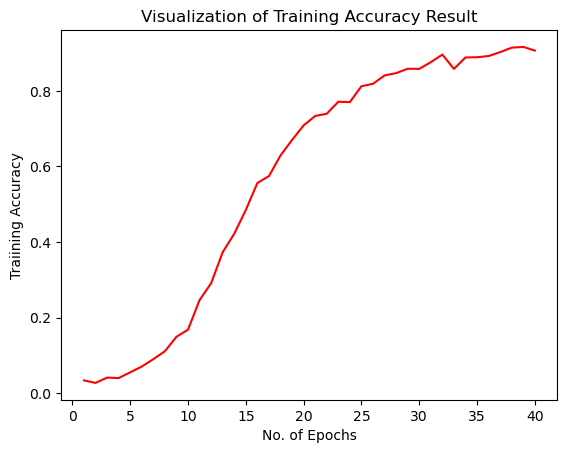

In [27]:
epochs = [i for i in range(1,41)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

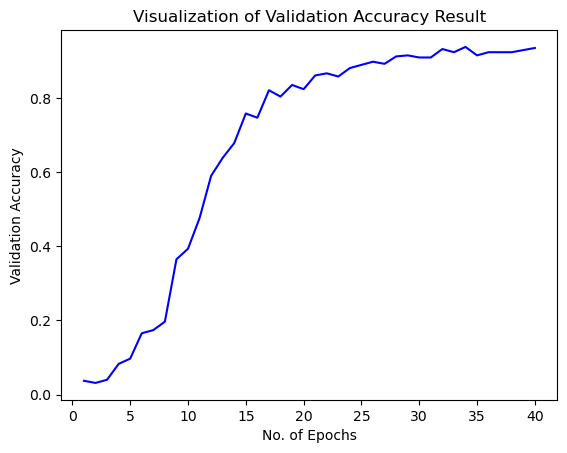

In [28]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

## Test set Evaluation

In [105]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [106]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.9312 - loss: 0.7435
Test accuracy: 0.9359331727027893


In [107]:
cnn = tf.keras.models.load_model('trained_model.h5')

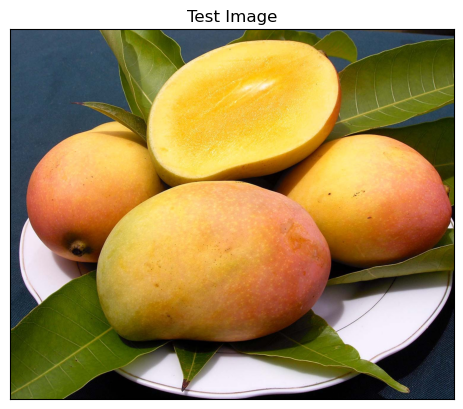

In [116]:
#Test Image Visualization
import cv2
image_path = 'Image_2.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [117]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [118]:
print(predictions)

[[1.9460264e-17 2.9220916e-16 3.4644504e-22 7.4767783e-09 1.5653779e-16
  1.6558203e-13 6.8554869e-14 1.9598095e-16 7.7465009e-15 7.2459738e-15
  3.1292882e-20 5.3137589e-23 7.8304980e-21 2.2466702e-21 1.9490686e-21
  4.1102748e-16 5.3104773e-15 3.8300411e-17 2.2573247e-19 1.0000000e+00
  1.1074646e-16 1.1807081e-16 2.5890306e-13 3.6466886e-15 3.0953853e-17
  1.7890999e-19 5.0114837e-16 9.3556212e-15 2.2923219e-26 1.1935628e-19
  1.2075906e-19 6.1395860e-17 1.7396148e-18 7.2523441e-20 1.2270884e-21
  5.4025961e-20]]


In [119]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [120]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])  # Mendapatkan indeks pertama

19


In [121]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

19


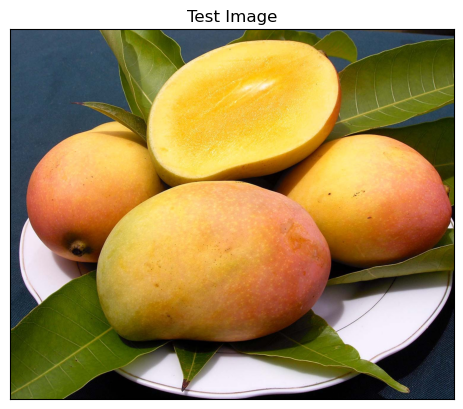

In [122]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [123]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a mango
